In [1]:
import numpy as np
import pandas as pd
import graphviz 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from IPython.display import SVG, display
from graphviz import Source
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('VertebralColumnDataset.csv')
dataset.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_label
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,DH
2,68.83,22.22,50.09,46.61,105.99,-3.53,DH
3,69.30,24.65,44.31,44.64,101.87,11.21,DH
4,49.71,9.65,28.32,40.06,108.17,7.92,DH


In [25]:
#Create the partitions:
partitions = {}
random_states = [0, 144]
percentages = [20,30,40]

x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:,0:6],
                                                        dataset.iloc[:,6:],
                                                        stratify=dataset.iloc[:,6:]
                                                        )
#LE.fit(y_train)
for i in random_states:
    J={}
    for j in percentages:
        x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:,0:6],
                                                        dataset.iloc[:,6:],
                                                        test_size=j/100.0,
                                                        stratify=dataset.iloc[:,6:],
                                                        random_state=i)
        #y_train = LE.transform(y_train)
        #y_test = LE.transform(y_test)
        J[j]={'train':(x_train,y_train),'test':(x_test,y_test)}
    partitions[i]=J

In [26]:
# print(y_train[2:13])
# print(LE.transform(y_train)[2:13])
print(y_train[2:13])

    class_label
259          NO
115          SL
74           SL
166          SL
44           DH
108          SL
294          NO
182          SL
135          SL
152          SL
120          SL


In [27]:
LE = LabelEncoder()
LE = LE.fit(y_train)

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [46]:
x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:,0:6],
                                                        dataset.iloc[:,6:],
                                                        test_size=0.4,
                                                        stratify=dataset.iloc[:,6:],
                                                        random_state=0,
                                                        )
    

In [47]:
y_trainLE = LE.transform(y_train)
y_testLE = LE.transform(y_test)

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
print(y_testLE[0:20])
y_test[0:20]

[2 1 2 2 2 1 2 0 2 1 2 1 2 2 0 2 2 2 0 1]


,class_label
169,SL
285,NO
100,SL
103,SL
95,SL
278,NO
101,SL
53,DH
148,SL
252,NO


In [49]:
mapping = {0:'DH', 1:'NO', 2:'SL'}

In [50]:
random_forest_models = []

for i in range(1, 11):
    clf = RandomForestClassifier(n_estimators = i)
    clf = clf.fit(x_train, y_trainLE)
    random_forest_models.append(clf)
    print(i, clf.score(x_test,y_testLE))

1 0.7580645161290323
2 0.7983870967741935
3 0.8467741935483871
4 0.8548387096774194
5 0.8387096774193549
6 0.8064516129032258
7 0.8467741935483871
8 0.8870967741935484
9 0.8629032258064516
10 0.8548387096774194


In [51]:
import pickle
with open('rfc.pkl', 'wb') as output:
    pickle.dump(random_forest_models, output, pickle.HIGHEST_PROTOCOL)

In [52]:
import matplotlib.pyplot as plt

In [58]:
x = [1,2,3,4,5,6,7,8,9,10]
y = []
for i in x:
    y.append(random_forest_models[i-1].score(x_test,y_testLE))

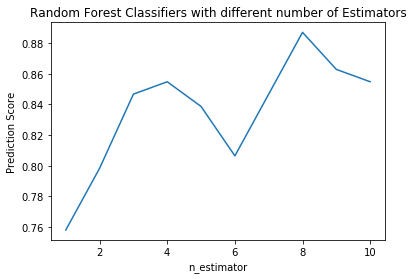

In [60]:
plt.plot(x, y)
plt.title('Random Forest Classifiers with different number of Estimators')
plt.xlabel('n_estimator')
plt.ylabel('Prediction Score')
plt.savefig('Estimators vs Score for RF.png')
plt.show()

In [62]:
selected_clf = random_forest_models[7]
print("Selected model performance: ", selected_clf.score(x_test,y_testLE))

Selected model performance:  0.8870967741935484


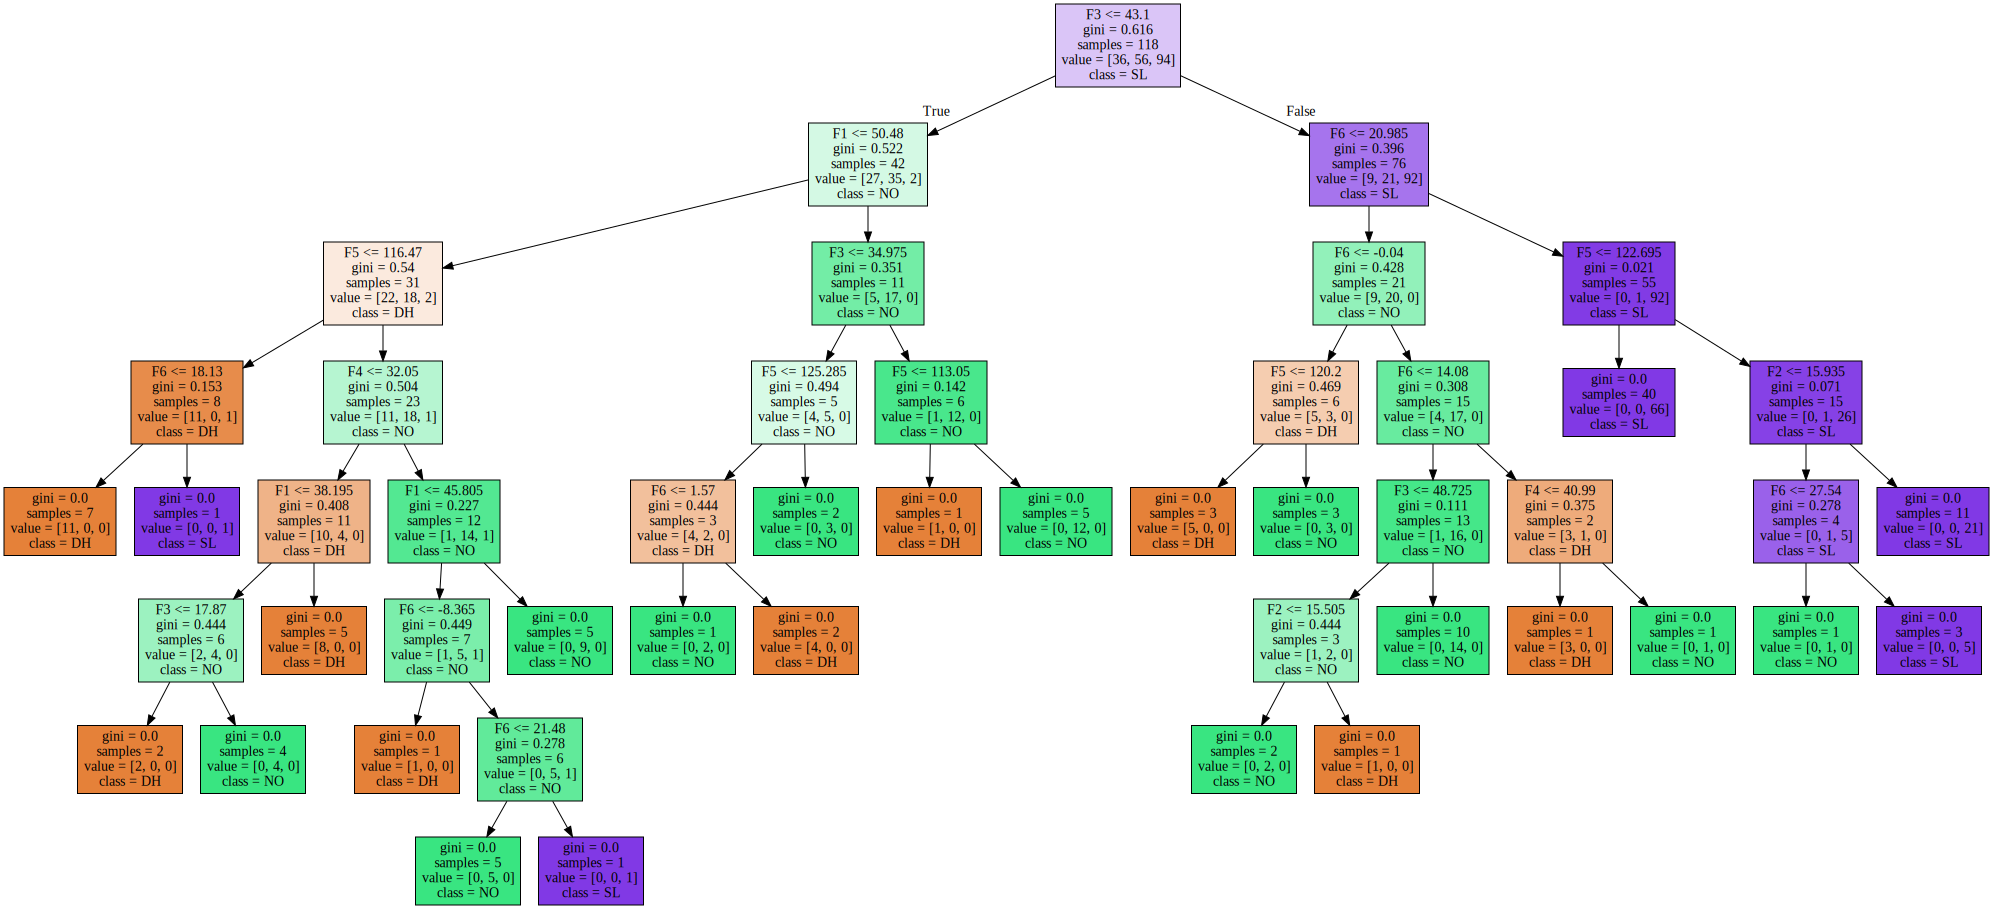

In [71]:
graph = Source(export_graphviz(selected_clf.estimators_[7], out_file=None
   , feature_names=['F1','F2','F3','F4','F5','F6'], class_names=[mapping[0], mapping[1], mapping[2]] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [72]:
#i = 1
#for est in selected_clf.estimators_:
    
#    graph = Source(export_graphviz(est, out_file=None
#       , feature_names=['F1','F2','F3','F4','F5','F6'], class_names=[mapping[0], mapping[1], mapping[2]] 
#       , filled = True))
#    display(SVG(graph.pipe(format='svg')))
#    graph.format='JPEG'
#    graph.render("lol_{}".format(i))
#   i+=1


In [73]:
for i in range(len(selected_clf.estimators_)):
    print(selected_clf.estimators_[i].score(x_test,y_testLE))

0.8225806451612904
0.75
0.7096774193548387
0.7903225806451613
0.7983870967741935
0.7903225806451613
0.782258064516129
0.782258064516129


In [75]:
print('RFE: ', selected_clf.feature_importances_)
for component in selected_clf:
    print(component.feature_importances_)

RFE:  [0.10766513 0.07942137 0.15734829 0.13147722 0.10726637 0.41682162]
[0.01533515 0.10138233 0.08230556 0.12271281 0.04613305 0.63213112]
[0.06185269 0.14457053 0.14332144 0.29387582 0.09736222 0.25901731]
[0.27830443 0.11989856 0.01804772 0.22487325 0.11103957 0.24783647]
[0.3395631  0.13397869 0.0287564  0.08618362 0.05157726 0.35994092]
[0.00355081 0.01775405 0.12253157 0.04274626 0.09014934 0.72326797]
[0.01587302 0.06777736 0.27338681 0.07264957 0.23062364 0.33968959]
[0.08978885 0.03612057 0.26280444 0.14516555 0.11677058 0.34935001]
[0.05705296 0.01388889 0.3276324  0.06361088 0.11447529 0.42333958]


Information about the component trees of the random forest classifier can be obtained using the estimators_ field of the classifier. For example, we can display information about the first component tree in the random forest as follows:
 clf.estimators_[0] 

In [76]:
nb = GaussianNB()
nb = nb.fit(x_train, y_train)
#prediction = nb.predict(irisTest)
#print(iris.target_names[prediction])

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
print(nb.score(x_test,y_test))

0.8629032258064516
